- $SST = SSE + SSR$
- $\sum(Y_{i}-\bar{y})^2 = \sum(Y_{i} - \hat{Y})^2 + \sum(\hat{Y} - \bar{Y})^2$
#### in this formula if portion of SSR is bigger than SSE we have a more solid model

---

$R^2 = \frac{SSR}{SST} ; 0\leq R^2\leq1$
- most suitable value for $R^2$ is dependent on the industry that we use it in e.g. in Biological sciences value like 0.6 is enough but for engineering and physics value more towards 1 is better like 0.9 , 0.95.
- $R^2$ show much a X can be explanotary for Y if this rate is closer to 1 the model work better


In [27]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf

# create random data
X_var = []
Y_var = []

for k in range(1,500):
    x = k+15
    X_var.append(x + np.random.normal(loc=0.0 , scale = 4.0))
    Y_var.append(x*1.5 + np.random.normal(loc=0.0 , scale = 6.0))

reg_data = pd.DataFrame(list(zip(X_var , Y_var)) , columns = ['X' , 'Y'])
reg_data

,X,Y
0,19.017348,14.708470
1,14.376449,23.128223
2,20.046156,35.653035
3,20.200667,24.414240
4,21.835219,45.290897
...,...,...
494,516.906854,754.933475
495,504.256271,757.637562
496,510.504046,768.587489
497,510.654012,781.971725


In [28]:
reg = smf.ols(formula = 'Y ~ X' , data=reg_data).fit()
reg_data['Y pred'] = reg.predict()

In [29]:
reg_data['Residual'] = reg_data['Y'] - reg_data['Y pred']
std_res = reg_data['Residual'].std()
reg_data['Standrized residual'] = reg_data['Residual']/std_res 
reg_data

,X,Y,Y pred,Residual,Standrized residual
0,19.017348,14.708470,28.266932,-13.558462,-1.602250
1,14.376449,23.128223,21.304097,1.824127,0.215563
2,20.046156,35.653035,29.810475,5.842560,0.690436
3,20.200667,24.414240,30.042290,-5.628050,-0.665086
4,21.835219,45.290897,32.494642,12.796255,1.512178
...,...,...,...,...,...
494,516.906854,754.933475,775.260780,-20.327305,-2.402148
495,504.256271,757.637562,756.280851,1.356711,0.160327
496,510.504046,768.587489,765.654516,2.932974,0.346600
497,510.654012,781.971725,765.879512,16.092213,1.901673


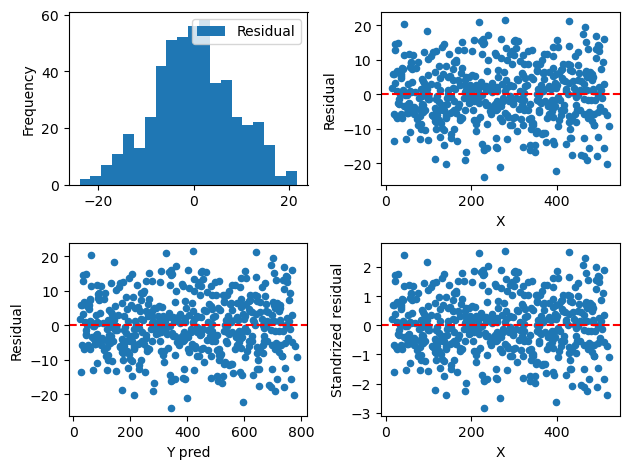

In [31]:
fig , ((hist1 , res_X2 ) , (res_Y3 , sres_X4)) = plt.subplots(2,2)
reg_data.plot(y = 'Residual' , kind='hist' , bins=20 , ax=hist1)
reg_data.plot('X' , 'Residual' , kind='scatter'  , ax=res_X2)
res_X2.axhline( y = 0.0 ,c='red', linestyle='dashed')
reg_data.plot('Y pred' , 'Residual' , kind='scatter' ,ax = res_Y3)
res_Y3.axhline(y= 0.0 , c='red' , linestyle='dashed')
reg_data.plot('X' , 'Standrized residual' , kind='scatter' , ax=sres_X4)
sres_X4.axhline(y=0.0 , c='red' , linestyle='dashed')
fig.tight_layout()
plt.show()

In [32]:
print(reg.params)

Intercept   -0.265185
X            1.500321
dtype: float64


In [33]:
print(reg.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                 3.246e+05
Date:                Wed, 26 Feb 2025   Prob (F-statistic):               0.00
Time:                        18:36:51   Log-Likelihood:                -1773.2
No. Observations:                 499   AIC:                             3550.
Df Residuals:                     497   BIC:                             3559.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.2652      0.795     -0.334      0.7